In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
    Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2024-01-06 22:11:08.867027: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 22:11:08.867074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 22:11:08.868534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 22:11:10.306124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pickle
from manejo_dataset_heartAttack import Data_set, Test_set, Validation_set

In [3]:
with open("./dataset.pkl", "rb") as pickle_file:
    dataset:Data_set = pickle.load(pickle_file)

In [4]:
print(dataset.validation_set[0].X_train)

[['fun new pokemon experience think graphic get entirely much hate aside one particularly ugly cloud everything look nice watercolor sort feel easily sink hour core gameplay loop fun'
  'Jan 30, 2022' '25 of 31 users found this helpful' '1 Review'
  '1 Rating' 0.0]
 ['jogo fantastico experi ncia que toda pessoa quis desde que lan ou pokemon historia boa graficos cenario meio ruin mas pokemons s o fantasticos jogabilidade e experi ncia perfeita tenho anos e apaixonei pelo jogo dos monstrinhos'
  'Jan 30, 2022' '25 of 31 users found this helpful' '1 Review'
  '1 Rating' 0.0]
 ['one good pokemon game ever breath fresh air series long overdue though graphic lack'
  'Jan 30, 2022' '26 of 32 users found this helpful' '1 Review'
  '1 Rating' 0.0]
 ...
 ['love game think one good absolute good pokemon game ever make also think contender goty true achievement game series scoring seem stop work game point accept was on narrative game story loosely make sense interesting capture imagination every

In [5]:
# Define the corpus

corpus = dataset.validation_set[0].X_train.astype(str).tolist()
 
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

After converting our words in the corpus into vector of integers:
[[169, 5, 98, 2, 3, 1], [170, 5, 98, 2, 3, 1], [171, 5, 121, 2, 3, 1], [172, 5, 173, 2, 3, 1], [174, 5, 121, 2, 3, 1], [175, 5, 72, 2, 3, 1], [176, 5, 73, 2, 3, 1], [177, 4, 72, 2, 3, 1], [178, 4, 72, 7, 8, 1], [179, 4, 73, 7, 36, 180], [181, 4, 74, 2, 3, 1], [182, 4, 122, 2, 3, 1], [183, 4, 123, 2, 3, 1], [184, 4, 24, 15, 16, 1], [185, 4, 33, 2, 3, 1], [186, 4, 73, 2, 3, 1], [187, 4, 33, 2, 3, 1], [188, 4, 75, 2, 3, 1], [189, 4, 122, 2, 62, 190], [191, 4, 124, 2, 3, 1], [192, 4, 193, 2, 3, 1], [194, 4, 51, 2, 3, 1], [195, 4, 196, 2, 3, 1], [197, 4, 63, 2, 3, 1], [198, 4, 63, 2, 3, 1], [199, 4, 63, 2, 3, 1], [200, 4, 201, 2, 64, 202], [203, 4, 52, 2, 3, 1], [204, 4, 51, 7, 8, 1], [205, 4, 125, 2, 3, 1], [206, 4, 65, 2, 3, 1], [207, 4, 126, 2, 3, 1], [208, 4, 99, 2, 3, 1], [209, 4, 99, 2, 3, 1], [210, 4, 31, 2, 3, 1], [211, 10, 127, 2, 3, 1], [212, 10, 34, 2, 8, 1], [213, 10, 125, 2, 3, 1], [214, 10, 65, 7, 8, 1], [215, 1

In [6]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
 
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] +\
            sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)
 
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
 
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')
 
 
# Load the pre-trained weights
model.load_weights('cbow_weights.h5')

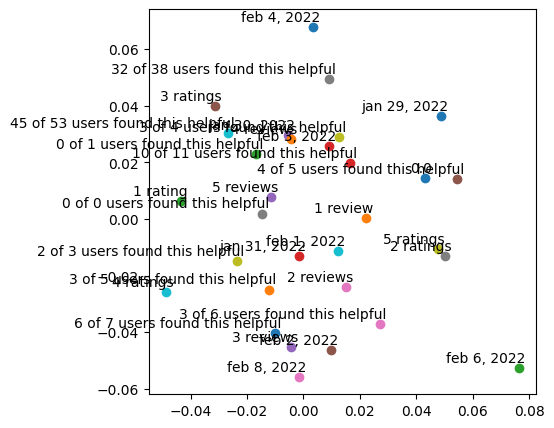

In [7]:
# Get the word embeddings
embeddings = model.get_weights()[0]
 
# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
 
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):

    if i >30: break

    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()